<a href="https://colab.research.google.com/github/InGev007/startup_acd/blob/main/lesson%2051/Lesson_51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 51

##Завдання:

До пункту видачі надійшли вироби з такими характеристиками: Всього виробів – 13000 одиниць, з них виготовлено на першому заводі — 8000 од., вагою 13 кг., зі стандартним відхиленням по вазі 0.5 кг.. На другому — 5000 од., вагою 12 кг., зі стандартним відхиленням по вазі 0.7 кг. Доля якісних виробів, вироблених на першому заводі, становить 0.85. Доля якісних виробів, вироблених на другому заводі 0,8.

*Написати код, з використанням EM-алгоритму, для визначення ймовірності, на якому заводі був вироблений виріб.*

##Рішення:

### Підключаємо бібліотеки

In [1]:
# імпортуємо бібліотеки, модулі
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

###Додаткові функції

In [2]:
# функція щільності ймовірності
def gaus_func(mu,sigma,x):
    return math.e**(-(x-mu)**2/(2*sigma**2)) / (sigma*(2*math.pi)**0.5)

# функція визначення ймовірностей приналежності деталей до верстата
def proba_x(X, w1, w2, mu_1, mu_2, sigma_1, sigma_2):
    for i in X:
        P1_x = gaus_func(mu_1,sigma_1,i)
        P2_x = gaus_func(mu_2,sigma_2,i)
        P_x = w1*P1_x + w2*P2_x
        P_x_1 = (w1*P1_x)/P_x
        P_x_2 = (w2*P2_x)/P_x
        proba_temp = []
        proba_temp.append(P_x_1)
        proba_temp.append(P_x_2)
        proba_X.append(proba_temp)
    return proba_X

# функція віднесення виробу до верстата
def pred_x(proba_X, limit_proba):
    pred_X = []
    for x in proba_X:
        if x[0] >= limit_proba:
            pred_X.append(1)
        else:
            pred_X.append(2)
    return np.array(pred_X)

# функція побудови графіків
def graph(X, pred_X, mu_1, sigma_1, mu_2, sigma_2):
    true_pred = []
    false_pred_1 = []
    false_pred_2 = []
    for i in range(X.shape[0]):
        if pred_X[i] == y[i]:
            true_pred.append([X[i], -0.025])
        else:
            if y[i] == 1:
                false_pred_1.append([X[i], -0.0075])
            else:
                false_pred_2.append([X[i], -0.015])

    false_pred_1 = np.array(false_pred_1)
    false_pred_2 = np.array(false_pred_2)
    true_pred = np.array(true_pred)

    x_theory = np.linspace(42, 85, 20000)
    y_theory_1 = []
    for x in x_theory:
        y_theory_1.append(gaus_func(mu_1,sigma_1,x))
    y_theory_2 = []
    for x in x_theory:
        y_theory_2.append(gaus_func(mu_2,sigma_2,x))

    plt.figure(figsize=(10, 8))
    plt.hist(
        X[:N1], bins = 'auto', color='#539caf', label = 'Вироблені на завод 1')
    plt.hist(
        X[N1:N], bins = 'auto', color='sandybrown', label = 'Вироблені на завод 2')
    plt.plot(mu_1, 0, 'o', markersize = 11, color = 'blue', label = 'Mu 1')
    plt.plot(mu_2, 0, 'o', markersize = 11, color = 'red', label = 'Mu 2')

    plt.plot([mu_1 - sigma_1, mu_1 - sigma_1], [0,0.85*np.max(y_theory_1)],
             ':', lw = 3, color = 'blue', alpha = 0.55, label = 'Mu1 - sigma1')
    plt.plot([mu_1 + sigma_1, mu_1 + sigma_1], [0,0.85*np.max(y_theory_1)],
             ':', lw = 3, color = 'blue', alpha = 0.55, label = 'Mu1 + sigma1')
    plt.plot([mu_2 - sigma_2, mu_2 - sigma_2], [0,0.85*np.max(y_theory_2)],
             ':', lw = 3, color = 'red', alpha = 0.55, label = 'Mu2 - sigma2')
    plt.plot([mu_2 + sigma_2, mu_2 + sigma_2], [0,0.85*np.max(y_theory_2)],
             ':', lw = 3, color = 'red', alpha = 0.55, label = 'Mu2 + sigma2')

    plt.plot([mu_1 - 2 * sigma_1, mu_1 - 2 * sigma_1], [0, 0.9*0.5 * np.max(y_theory_1)],
             ':', lw = 2.5, color = 'blue', alpha = 0.35, label = 'Mu1 - 2*sigma1')
    plt.plot([mu_1 + 2 * sigma_1, mu_1 + 2 * sigma_1], [0, 0.9*0.5 * np.max(y_theory_1)],
             ':', lw = 2.5, color = 'blue', alpha = 0.35, label = 'Mu1 + 2*sigma1')
    plt.plot([mu_2 - 2 * sigma_2, mu_2 - 2 * sigma_2], [0, 0.9*0.5 * np.max(y_theory_2)],
             ':', lw = 2.5, color = 'red', alpha = 0.35, label = 'Mu2 - 2*sigma2')
    plt.plot([mu_2 + 2 * sigma_2, mu_2 + 2 * sigma_2], [0, 0.9*0.5 * np.max(y_theory_2)],
             ':', lw = 2.5, color = 'red', alpha = 0.35, label = 'Mu2 + 2*sigma2')

    plt.plot(false_pred_1[:,0], false_pred_1[:,1], 'o', markersize = 2.5, color = 'blue', alpha = 0.2, label = 'errors1')
    plt.plot(false_pred_2[:,0], false_pred_2[:,1], 'o', markersize = 2.5, color = 'red', alpha = 0.3, label = 'errors2')
    plt.plot(true_pred[:,0], true_pred[:,1], 'o', markersize = 3, color = 'green', alpha = 0.2, label = 'right answers')

    plt.xlabel('Вага')
    plt.ylabel('Щільність ймовірності (p)')
    plt.legend()
    plt.show()

### Вхідні данні

In [3]:
# кількість виробів на верстаті №1
N1 = 8000
# кількість виробів на верстаті №2
N2 = 5000
# кількість виробів вироблених на обох верстатах
N = N1+N2
# вага виробу верстата №1
mu_1 = 13.0
# стандартне відхилення ваги виробу верстата №1
sigma_1 = 0.5
# вага виробу верстата №2
mu_2 = 12.0
# стандартне відхилення ваги виробу верстата №2
sigma_2 = 0.7
# доля якісних виробів №1
w1 = 0.85
# доля якісних виробів №2
w2 = 0.8

### Розрахунок ймовіностей

Доля вірно визначених виробів: 0.818 

Графік №1


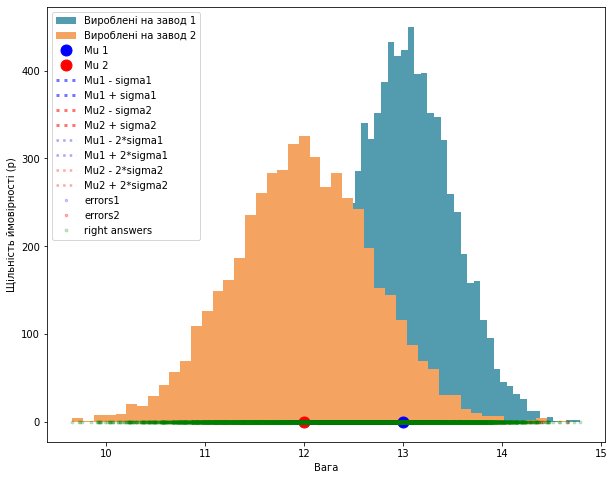

In [4]:
X = np.zeros((N))
np.random.seed(seed=2023)

# ініціалізуємо дані щодо деталей, виробництва верстата №1
X[:N1] = np.random.normal(loc=mu_1, scale=sigma_1, size=N1)

# ініціалізуємо дані щодо деталей, виробництва верстата №2
X[N1:N] = np.random.normal(loc=mu_2, scale=sigma_2, size=N2)

# ініціалізуємо вектор відповідей
y = np.zeros((N))
y[:N1] = np.array((1))
y[N1:N] = np.array((2))

# ймовірність приналежності до того чи іншого верстата
proba_X = []
proba_X = proba_x(X, w1, w2, mu_1, mu_2, sigma_1, sigma_2)

# поріг ймовірності, при досягненні якого, виріб ставитиметься до того чи іншого верстата
limit_proba = 0.5

# визначимо приналежність деталі до верстата
pred_X = []
pred_X = pred_x(proba_X, limit_proba)

# визначимо якість нашого алгоритму
print ('Доля вірно визначених виробів:', round(accuracy_score(y, pred_X),3), '\n')

print('Графік №1')
graph(X, pred_X, mu_1, sigma_1, mu_2, sigma_2)

###Висновок:
Точність наведеного алгоритму є досить високою і становить 0.82